In [0]:
#read .tsv files
import csv

columns = {0:'ID', 1:'label', 2:'statement', 3:'subject', 4:'speaker', 5:'job_title',
          6:'state', 7:'party', 8:'barely_true', 9:'false', 10:'half_true', 11:'mostly_true',
          12:'pants_on_fire', 13:'context'}

def readTsvFile(file_name):
  tsv_file = open(file_name)
  read_tsv = csv.reader(tsv_file, delimiter='\t')
  dataset = []
  for row in read_tsv:
    dataset.append(row)

  print('row1_example:', dataset[0])
  print('features:', len(dataset[0]))
  print('examples:', len(dataset))
  print('features:', len(dataset[0]))

  return dataset

In [29]:
train_dataset = readTsvFile('train.tsv')

row1_example: ['2635.json', 'false', 'Says the Annies List political group supports third-trimester abortions on demand.', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', '0', '1', '0', '0', '0', 'a mailer']
features: 14
examples: 10240
features: 14


In [30]:
val_dataset = readTsvFile('valid.tsv')

row1_example: ['12134.json', 'barely-true', 'We have less Americans working now than in the 70s.', 'economy,jobs', 'vicky-hartzler', 'U.S. Representative', 'Missouri', 'republican', '1', '0', '1', '0', '0', 'an interview with ABC17 News']
features: 14
examples: 1284
features: 14


In [31]:
test_dataset = readTsvFile('test.tsv')

row1_example: ['11972.json', 'true', 'Building a wall on the U.S.-Mexico border will take literally years.', 'immigration', 'rick-perry', 'Governor', 'Texas', 'republican', '30', '30', '42', '23', '18', 'Radio interview']
features: 14
examples: 1267
features: 14


In [0]:
#plotting bar charts
import matplotlib.pyplot as plt

def plottingData(column_name, arr_X, arr_y):
  fig = plt.figure()
  ax = fig.add_axes([1, 1, 2, 2])
  ax.bar(arr_X, arr_y)
  ax.set_xlabel(column_name)
  ax.set_ylabel('count')
  plt.xticks(rotation=90)
  plt.show()

def removeSpace(string):
  if string[-1] != ' ':
    return string
  space_count = 0
  pos = -1
  while string[pos] == ' ':
    pos -= 1
  
  return string[:pos+1]

#caculate numbers of each category in each columns
def categoryChecker(dataset, column_name, n):  
  category = {}

  for row in dataset:
    if len(row) > n:
      if row[n] == '' or row[n] == 'N/A':
        row[n] = 'None' #missing data will rename as 'None'
      cleaned_string = removeSpace(row[n])
      if cleaned_string in category:     
        category[cleaned_string] += 1 
      if cleaned_string not in category:
        category[cleaned_string] = 1
    else:
      print('Suspicious case:', row[0]) #len(row) <= n?
  
  category = {k: v for k, v in sorted(category.items(), key=lambda x: x[1],
                                      reverse=True)} #sorting dictionary

  count = 0
  arr_X = []
  arr_y = []
  for k, v in category.items():
    count += v
    arr_X.append(k)
    arr_y.append(v)

  print(column_name, ':', category)  
  print('The total number of examples:', count)
  print('The number of categories:', len(arr_X))
  plottingData(column_name, arr_X, arr_y) #call plotting function

label : {'half-true': 2114, 'false': 1995, 'mostly-true': 1962, 'true': 1676, 'barely-true': 1654, 'pants-fire': 839}
The total number of examples: 10240
The number of categories: 6


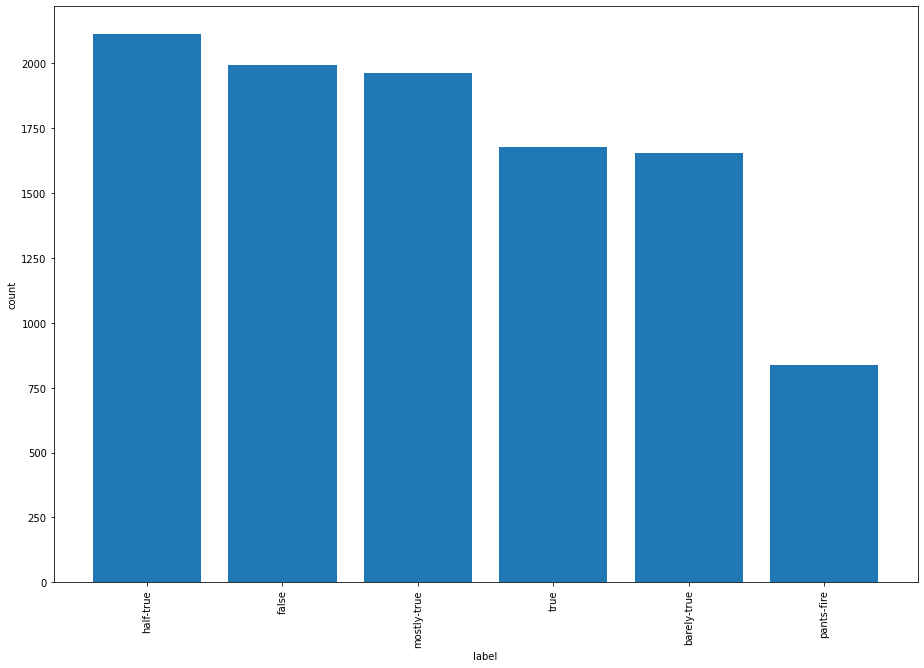

Suspicious case: 638.json
Suspicious case: 1626.json
state : {'None': 2208, 'Texas': 1009, 'Florida': 1003, 'Wisconsin': 714, 'New York': 659, 'Illinois': 558, 'Ohio': 447, 'Georgia': 433, 'Virginia': 408, 'Rhode Island': 370, 'Oregon': 242, 'New Jersey': 241, 'Massachusetts': 212, 'Arizona': 182, 'California': 163, 'Washington, D.C.': 132, 'Vermont': 98, 'Pennsylvania': 90, 'New Hampshire': 87, 'Arkansas': 84, 'Tennessee': 75, 'Kentucky': 74, 'Maryland': 69, 'Delaware': 68, 'Alaska': 65, 'North Carolina': 56, 'Minnesota': 56, 'Nevada': 48, 'Indiana': 38, 'Missouri': 36, 'New Mexico': 30, 'South Carolina': 29, 'Louisiana': 29, 'Colorado': 25, 'Connecticut': 22, 'Michigan': 22, 'Iowa': 19, 'Utah': 19, 'Kansas': 16, 'Oklahoma': 14, 'Alabama': 14, 'District of Columbia': 12, 'West Virginia': 7, 'Washington': 7, 'Washington state': 6, 'Wyoming': 4, 'Virgina': 3, 'Nebraska': 3, 'South Dakota': 3, 'Idaho': 3, 'Washington D.C.': 2, 'Unknown': 2, 'Mississippi': 2, 'North Dakota': 2, 'Maine': 2

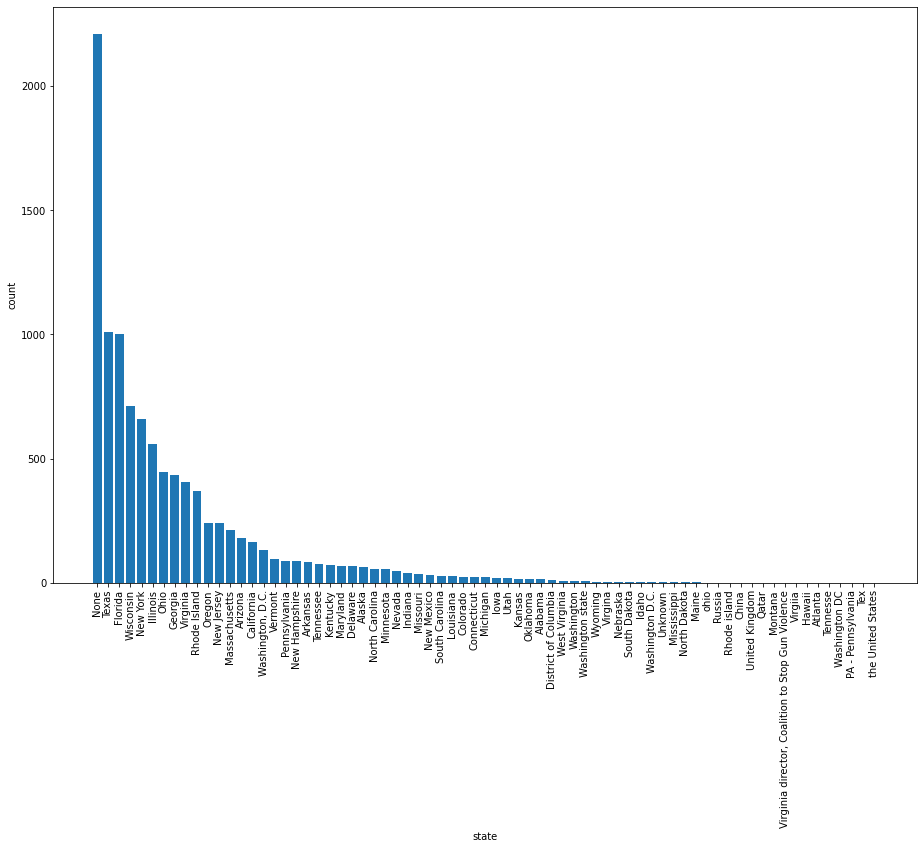

Suspicious case: 638.json
Suspicious case: 1626.json
party : {'republican': 4497, 'democrat': 3336, 'none': 1744, 'organization': 219, 'independent': 147, 'newsmaker': 56, 'libertarian': 40, 'activist': 39, 'journalist': 38, 'columnist': 35, 'talk-show-host': 26, 'state-official': 20, 'labor-leader': 11, 'tea-party-member': 10, 'business-leader': 9, 'green': 3, 'education-official': 2, 'liberal-party-canada': 1, 'government-body': 1, 'Moderate': 1, 'democratic-farmer-labor': 1, 'ocean-state-tea-party-action': 1, 'constitution-party': 1}
The total number of examples: 10238
The number of categories: 23


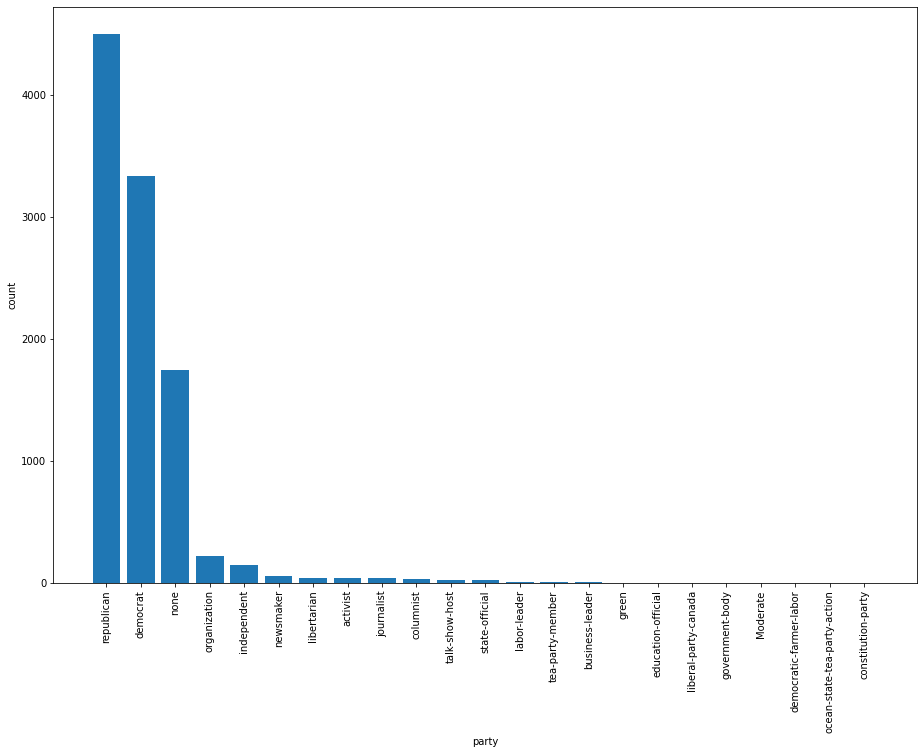

label : {'half-true': 2114, 'false': 1995, 'mostly-true': 1962, 'true': 1676, 'barely-true': 1654, 'pants-fire': 839}
The total number of examples: 10240
The number of categories: 6


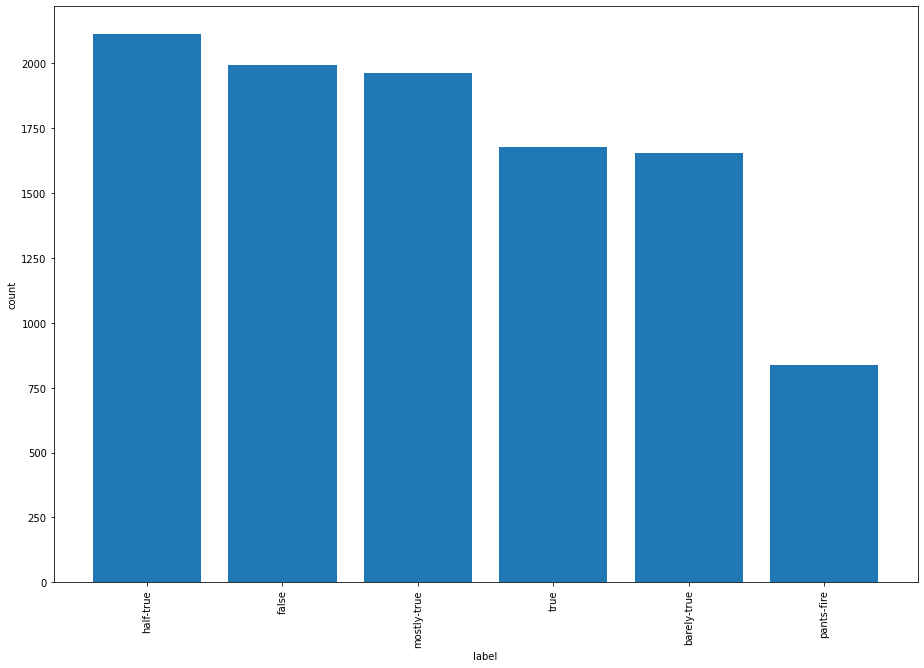

Suspicious case: 638.json
Suspicious case: 1626.json
state : {'None': 2208, 'Texas': 1009, 'Florida': 1003, 'Wisconsin': 714, 'New York': 659, 'Illinois': 558, 'Ohio': 447, 'Georgia': 433, 'Virginia': 408, 'Rhode Island': 370, 'Oregon': 242, 'New Jersey': 241, 'Massachusetts': 212, 'Arizona': 182, 'California': 163, 'Washington, D.C.': 132, 'Vermont': 98, 'Pennsylvania': 90, 'New Hampshire': 87, 'Arkansas': 84, 'Tennessee': 75, 'Kentucky': 74, 'Maryland': 69, 'Delaware': 68, 'Alaska': 65, 'North Carolina': 56, 'Minnesota': 56, 'Nevada': 48, 'Indiana': 38, 'Missouri': 36, 'New Mexico': 30, 'South Carolina': 29, 'Louisiana': 29, 'Colorado': 25, 'Connecticut': 22, 'Michigan': 22, 'Iowa': 19, 'Utah': 19, 'Kansas': 16, 'Oklahoma': 14, 'Alabama': 14, 'District of Columbia': 12, 'West Virginia': 7, 'Washington': 7, 'Washington state': 6, 'Wyoming': 4, 'Virgina': 3, 'Nebraska': 3, 'South Dakota': 3, 'Idaho': 3, 'Washington D.C.': 2, 'Unknown': 2, 'Mississippi': 2, 'North Dakota': 2, 'Maine': 2

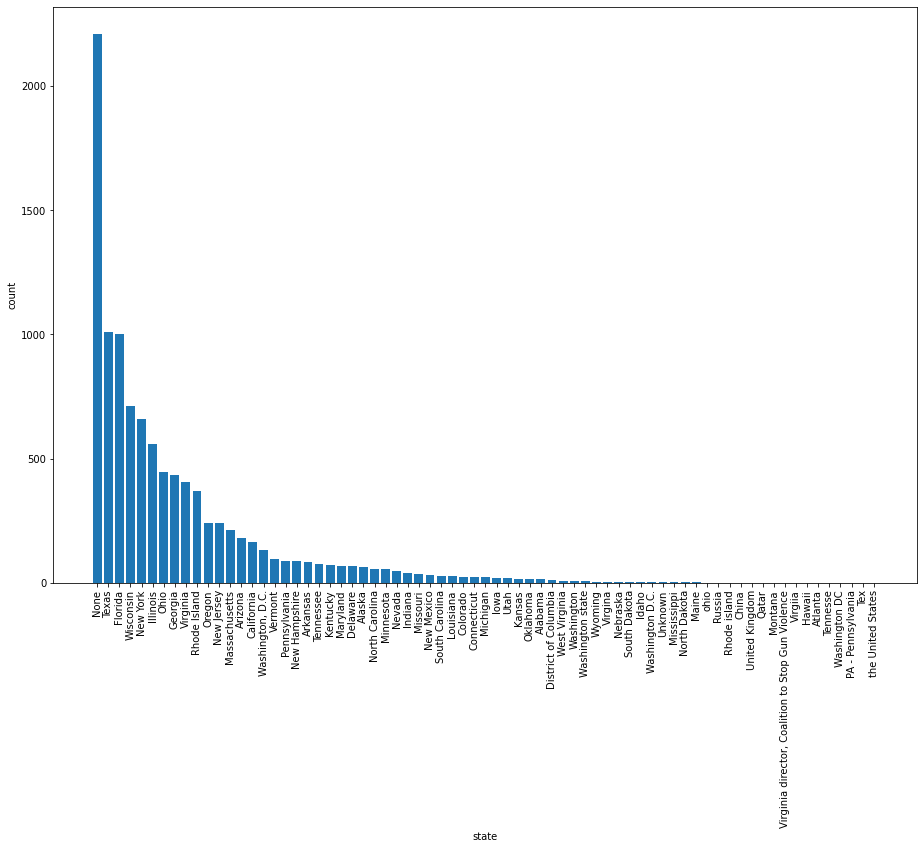

Suspicious case: 638.json
Suspicious case: 1626.json
party : {'republican': 4497, 'democrat': 3336, 'none': 1744, 'organization': 219, 'independent': 147, 'newsmaker': 56, 'libertarian': 40, 'activist': 39, 'journalist': 38, 'columnist': 35, 'talk-show-host': 26, 'state-official': 20, 'labor-leader': 11, 'tea-party-member': 10, 'business-leader': 9, 'green': 3, 'education-official': 2, 'liberal-party-canada': 1, 'government-body': 1, 'Moderate': 1, 'democratic-farmer-labor': 1, 'ocean-state-tea-party-action': 1, 'constitution-party': 1}
The total number of examples: 10238
The number of categories: 23


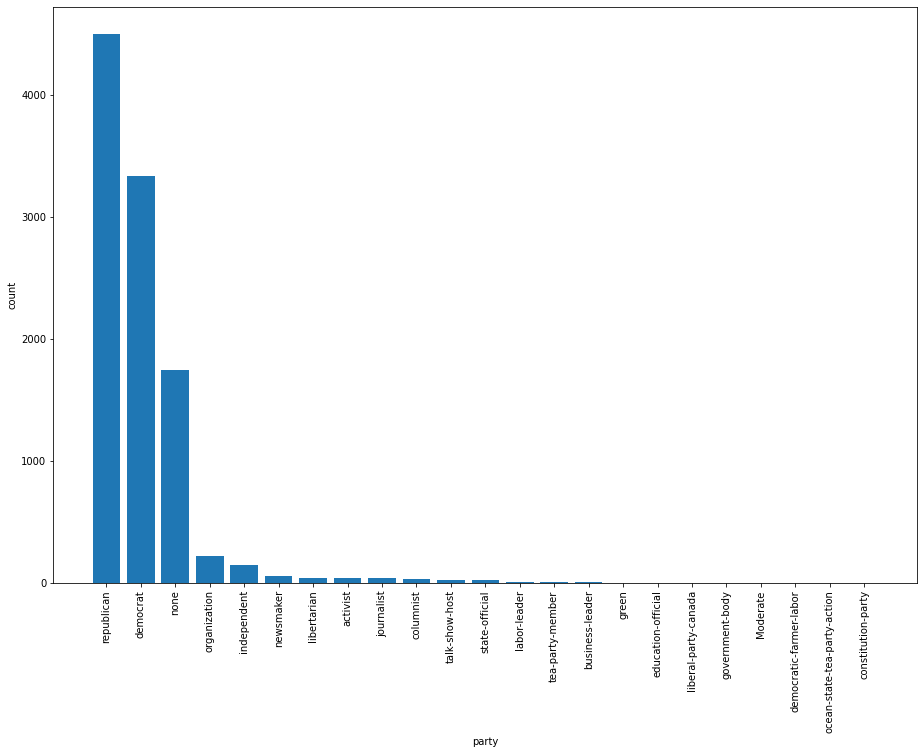

label : {'half-true': 2114, 'false': 1995, 'mostly-true': 1962, 'true': 1676, 'barely-true': 1654, 'pants-fire': 839}
The total number of examples: 10240
The number of categories: 6


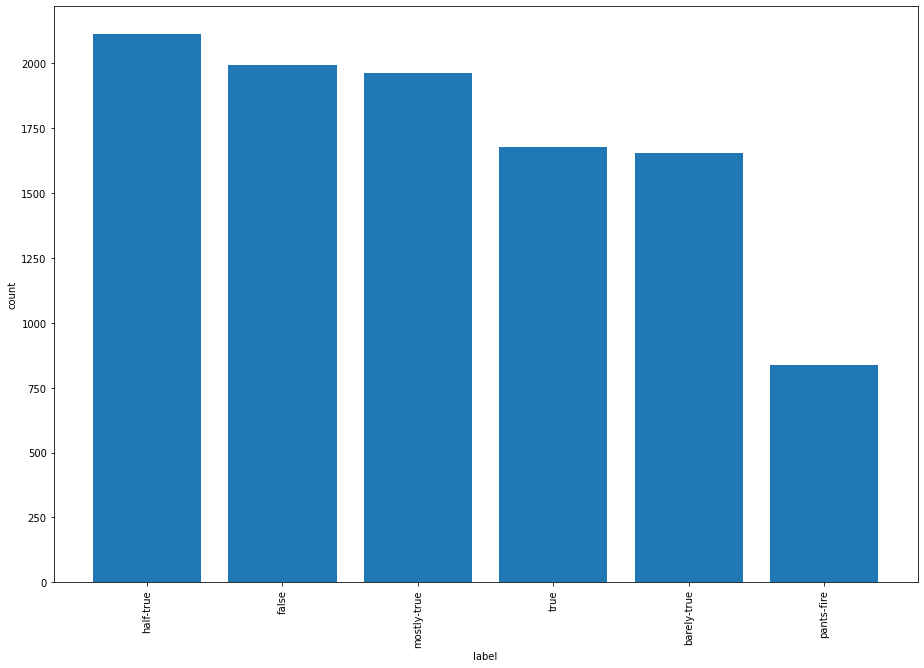

Suspicious case: 638.json
Suspicious case: 1626.json
state : {'None': 2208, 'Texas': 1009, 'Florida': 1003, 'Wisconsin': 714, 'New York': 659, 'Illinois': 558, 'Ohio': 447, 'Georgia': 433, 'Virginia': 408, 'Rhode Island': 370, 'Oregon': 242, 'New Jersey': 241, 'Massachusetts': 212, 'Arizona': 182, 'California': 163, 'Washington, D.C.': 132, 'Vermont': 98, 'Pennsylvania': 90, 'New Hampshire': 87, 'Arkansas': 84, 'Tennessee': 75, 'Kentucky': 74, 'Maryland': 69, 'Delaware': 68, 'Alaska': 65, 'North Carolina': 56, 'Minnesota': 56, 'Nevada': 48, 'Indiana': 38, 'Missouri': 36, 'New Mexico': 30, 'South Carolina': 29, 'Louisiana': 29, 'Colorado': 25, 'Connecticut': 22, 'Michigan': 22, 'Iowa': 19, 'Utah': 19, 'Kansas': 16, 'Oklahoma': 14, 'Alabama': 14, 'District of Columbia': 12, 'West Virginia': 7, 'Washington': 7, 'Washington state': 6, 'Wyoming': 4, 'Virgina': 3, 'Nebraska': 3, 'South Dakota': 3, 'Idaho': 3, 'Washington D.C.': 2, 'Unknown': 2, 'Mississippi': 2, 'North Dakota': 2, 'Maine': 2

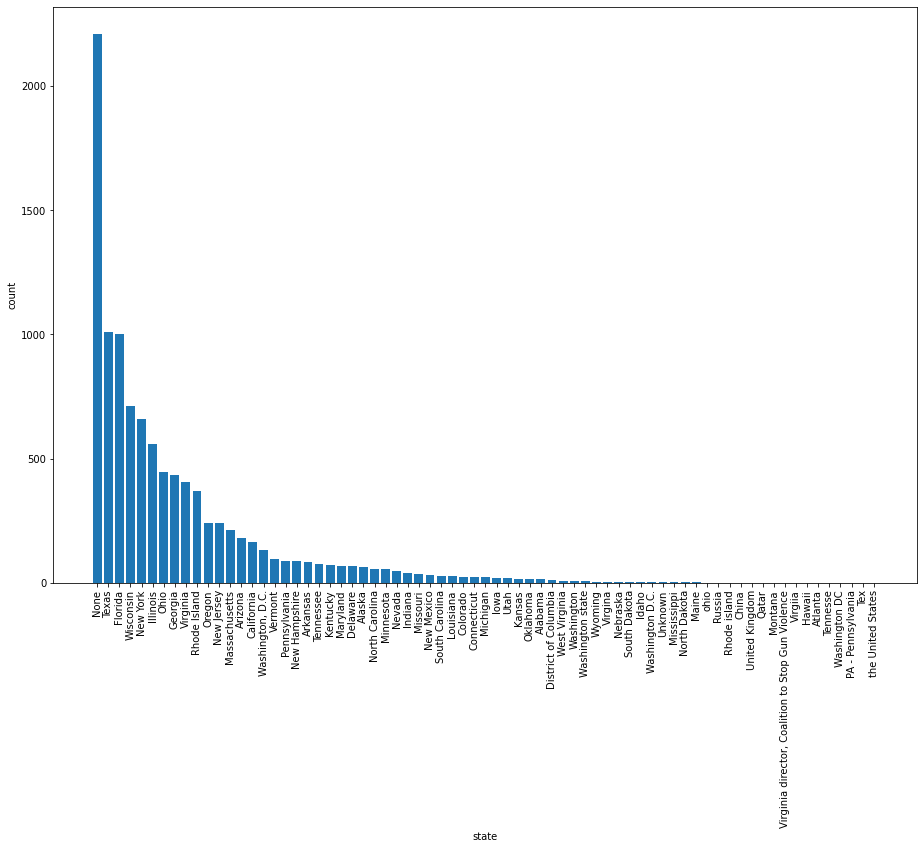

Suspicious case: 638.json
Suspicious case: 1626.json
party : {'republican': 4497, 'democrat': 3336, 'none': 1744, 'organization': 219, 'independent': 147, 'newsmaker': 56, 'libertarian': 40, 'activist': 39, 'journalist': 38, 'columnist': 35, 'talk-show-host': 26, 'state-official': 20, 'labor-leader': 11, 'tea-party-member': 10, 'business-leader': 9, 'green': 3, 'education-official': 2, 'liberal-party-canada': 1, 'government-body': 1, 'Moderate': 1, 'democratic-farmer-labor': 1, 'ocean-state-tea-party-action': 1, 'constitution-party': 1}
The total number of examples: 10238
The number of categories: 23


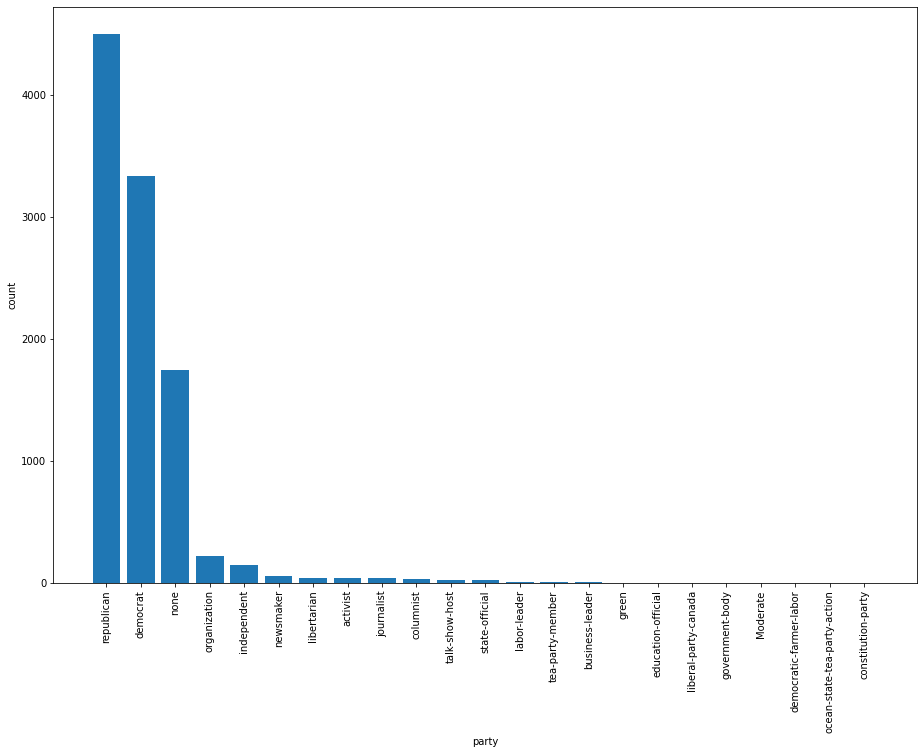

In [33]:
#caculate numbers of examples in each category: 'label', 'party', 'state' in 
#train, val, test datasets
for dataset in [train_dataset, val_dataset, test_dataset]:
  for i in [1, 6, 7]:
    categoryChecker(train_dataset, columns[i], i)

In [0]:
#One-hot encoding
#First, encode every single column
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def encodingData(dataset, column_number, num):
  num_VQs = num
  data = dataset
  questions_list = []
  excluded_json = set(['638.json', '1626.json'])

  for vq in data[0:num_VQs]:
    if vq[0] not in excluded_json:
      question = vq[column_number]
      questions_list.append(question)

  vectorizer = CountVectorizer()  
  doc = np.array([questions_list])
  bag = vectorizer.fit_transform(doc.ravel())

  tfidf = TfidfTransformer()
  result = tfidf.fit_transform(bag)
  np.set_printoptions(precision=2)
  result = result.toarray()
  result = result.tolist()
  
  return result

In [0]:
#Turn encoded data to prepare the dataset
#Also, append the credit histories as a sole feature
def formingDataset(encoding_lists):
  res = []
  length = len(encoding_lists)
  counter = 0
  credit_history_columns = [8, 9, 10, 11, 12]

  for pos in range(length-1):
    sub_res = encoding_lists[pos]
    # for lst in encoding_lists:
    #   sub_res.append(lst[pos])
    
    credit_history = []
    for pos2 in credit_history_columns:
       credit_history.append(dataset[counter][pos2])
    
    row = sub_res + credit_history
    res.append(row)  
    
  return res

In [0]:
#Run "encoding_data" function and "forming_dataset" function
def runEncodingAndFormingDataset(dataset):
  temp_lists = []
  columns_encoding_needed = [2, 3, 4, 5, 6, 7, 13]

  for v in columns_encoding_needed:
    encoded = encodingData(dataset, v, len(dataset))
    temp_lists.append(encoded)

  encoding_lists = []
  for i in range(len(temp_lists)):
    encoding_lists += temp_lists[i]

  prepared_X = formingDataset(encoding_lists)
  print(prepared_X[-1])

  #Prepared target dataset
  prepared_y = []
  for row in dataset:
    prepared_y.append(row[1])
  print(prepared_y[:10])

  return prepared_X, prepared_y

In [11]:
X_train, y_train = runEncodingAndFormingDataset(train_dataset)

[0.33672345511830987, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.359578763116833, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [12]:
X_val, y_val = runEncodingAndFormingDataset(val_dataset)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4649473900475308, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.358130117775457, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [13]:
X_test, y_test = runEncodingAndFormingDataset(test_dataset)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7888810978743, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [16]:
seen = set()
for i in range(len(X_train)):
  if len(X_train[i]) not in seen:
    seen.add(len(X_train[i])) 
    
seen

{38, 83, 183, 1147, 2185, 3341, 12198}

In [0]:
from sklearn.neighbors import KNeighborsClassifier

def trainKNN(X_train_transform, X_val_transform, num_neighbor, KNN_type):
  n_neighbor = num_neighbor
  p_value = KNN_type
  best_KNN_val_acc = 0
  best_n_neighbor = []
  best_p_value = []


  for neighbor in n_neighbor:
    for pv in p_value:
      KNN = KNeighborsClassifier(n_neighbors = neighbor, p = pv)
      KNN.fit(X_train_transform, y_train)

      KNN_val_acc = KNN.score(X_val_transform, y_val)

      if KNN_val_acc > best_KNN_val_acc:
        best_KNN_val_acc = KNN_val_acc
        best_n_neighbor = neighbor
        best_p_value = pv
      elif KNN_val_acc == best_KNN_val_acc:
        best_n_neighbor.append(n_neighbor)
        best_p_value.append(p_value)
      print('Neighbors:', neighbor, 'KNN type:', pv, 'Accuracy:', KNN_val_acc)
  print('Best Accuracy:', best_KNN_val_acc, 'num of neighbors:', best_n_neighbor, 'KNN type:', best_p_value)

  return best_n_neighbor, best_p_value

In [18]:
best_n_neighbor, best_p_value = trainKNN(X_train[:100], X_val[:100] ,[1,2,3], [1])

ValueError: ignored